In [73]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns


### <font color = "orange"> Q1. Load the texture dataset from OpenML: https://www.openml.org/search?type=data&sort=version&status=any&order=asc&exact_name=texture&id=40499 (1 Mark)

In [74]:
df = pd.read_csv('/content/original_texture_data.csv')

In [75]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Class
0,-1.223,-0.798,-0.867,-0.639,-0.545,-0.412,-0.795,-0.629,-0.547,-0.868,...,-0.766,-0.555,-0.714,-0.545,-0.587,-0.871,-0.620,-0.568,-0.607,5
1,-1.410,-1.029,-1.013,-0.895,-0.762,-0.676,-1.043,-0.851,-0.775,-1.037,...,-0.919,-0.770,-0.847,-0.663,-0.723,-1.013,-0.748,-0.698,-0.817,5
2,-1.107,-0.649,-0.629,-0.492,-0.367,-0.298,-0.682,-0.478,-0.395,-0.681,...,-0.692,-0.445,-0.588,-0.371,-0.368,-0.746,-0.457,-0.379,-0.469,5
3,-1.270,-0.855,-0.958,-0.707,-0.619,-0.469,-0.872,-0.705,-0.620,-0.988,...,-0.829,-0.719,-0.774,-0.617,-0.688,-0.937,-0.693,-0.657,-0.779,5
4,-1.331,-0.862,-0.761,-0.689,-0.498,-0.361,-0.857,-0.600,-0.496,-0.779,...,-0.861,-0.571,-0.784,-0.545,-0.562,-0.952,-0.642,-0.578,-0.648,5


### <font color = "orange"> Q2. Show the class distribution of the dataset and state whether the dataset is well balanced or not. (2 Marks)

<Axes: xlabel='Class', ylabel='Count'>

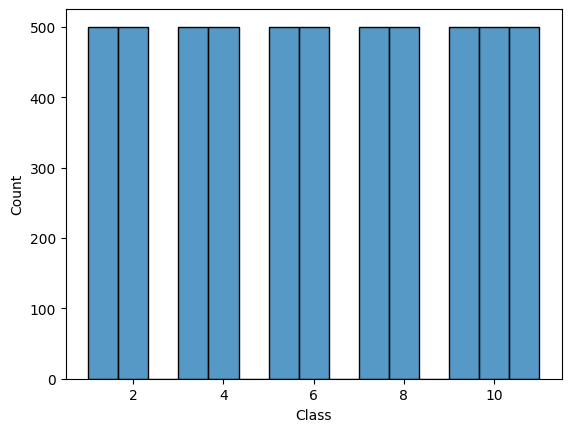

In [76]:
sns.histplot(df['Class'])
# this shows all classes have equal data

In [77]:
df['Class'].unique().size # this means there are 11 unique classes

11

### <font color = "orange"> Q3. Split the dataset into training and test sets (80%-20%) (1 Marks)

In [78]:
train_x,test_x,train_y,test_y = train_test_split(df.drop(columns = 'Class'),df['Class'],test_size = 0.2,random_state=42)

### <font color = "orange">Q4. Scale the features of the dataset appropriately such that all the features take values in the same range. (2 Marks)

In [79]:
#feature scaling is not required in naive baeyes

### <font color = "orange">Q5. Design a Gaussian Naive Bayes’ (NB) classifier and fit it on the training set (6 Marks)

In [80]:
import numpy as np
#continuous distribution naive baeyes classifier
class NaiveBayesClassifier:
    def __init__(self):
        # Initialize dictionaries to store prior probabilities and likelihoods
        self.mu = {}
        self.sigma = {}
        self.priors = {}

    def fit(self, X, y):
      self.classes = np.unique(y)
      for cls in self.classes:
        self.mu[cls] = []
        self.sigma[cls] = []
      self.num_features = X.shape[1]
      self.prior_prob = self.calculate_prior_probabilities(y)
      self.calc_mean_std(X,y)
    def calculate_prior_probabilities(self, y):
        # Calculate prior probabilities of each class
        classes, counts = np.unique(y, return_counts=True)  # Get unique classes and their counts
        total_count = len(y)  # Total number of samples
        self.priors = dict(zip(classes, counts / len(classes)))  # Calculate prior probabilities
        return self.priors


    def calc_mean_std(self, X, y):
      classes = self.classes
      num_features = self.num_features
      for cls in classes:
        temp_mu = []
        temp_sigma = []
        for feature in range(num_features):
          temp_mu.append(np.mean(X[y == cls][:, feature]))
          temp_sigma.append(np.std(X[y == cls][:, feature]))
        (self.mu)[cls] = temp_mu
        (self.sigma)[cls] = temp_sigma


    def calculate_posterior(self,sample,cls):
      mu = self.mu[cls]
      sigma = self.sigma[cls]
      num_features = len(mu)
      posterior = np.log(self.priors[cls])
      for i in range(num_features):
        sigma[i] += 1e-9
        posterior += (-((sample[i] - mu[i]) ** 2) / (2 * (sigma[i] ** 2)))
        posterior += np.log((1 / (np.sqrt(2 * np.pi) * sigma[i])))
      return posterior

    def predict(self, X):
        # List to store the predicted class for each sample
        predictions = []
        for sample in X:
            # Calculate the posterior probability for each class
            posteriors = [self.calculate_posterior(sample, cls) for cls in self.classes]
            predicted_class = self.classes[np.argmax(posteriors)]
            predictions.append(predicted_class)
        return predictions

### <font color = "orange">Q6. Evaluate the test set using the Gaussian NB classifier you learned from the training data and report the performance in terms of accuracy, precision, recall and confusion matrix. (2 Marks)

In [81]:

model1 = NaiveBayesClassifier()
model1.fit(train_x.values,train_y.values)
preds = model1.predict(test_x.values)

accuracy: 0.7818181818181819
precision: 0.7856649542981192
recall: 0.7818181818181819
The confusion matrix is 


<Axes: >

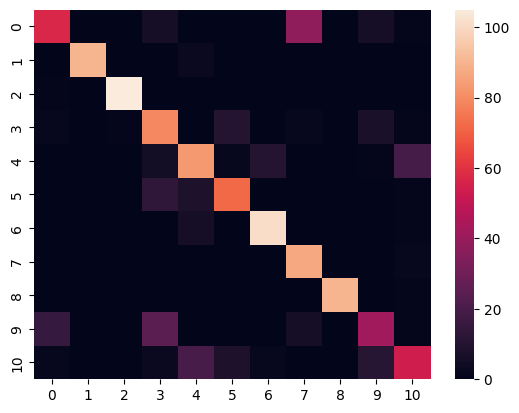

In [82]:
#lets evaluate performance
accuracy = accuracy_score(test_y,preds)
precision = precision_score(test_y,preds,average = 'weighted')
recall = recall_score(test_y,preds,average = 'weighted')
print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
conf_matrix = confusion_matrix(test_y,preds)
print('The confusion matrix is ')
sns.heatmap(conf_matrix)

### <font color = "orange">Q7. Using scikit-learn's implementation of Gaussian NB classifier, fit the training data. (4 Marks)

In [83]:
from sklearn.naive_bayes import GaussianNB

model2 = GaussianNB()
model2.fit(train_x,train_y)
preds_sklearn = model2.predict(test_x)

### <font color="orange">Q8. Evaluate the scikit-learn's Gaussian NB model on the test set. How does the performance of this model compare with your custom implementation? (2 Marks)

accuracy: 0.7818181818181819
precision: 0.7856649542981192
recall: 0.7818181818181819
The confusion matrix is 


<Axes: >

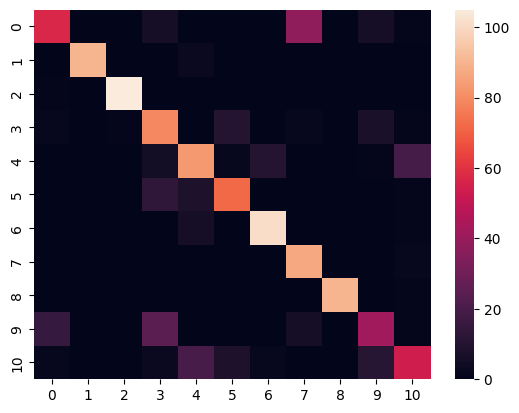

In [84]:
#lets evaluate performance
accuracy_sklearn = accuracy_score(test_y,preds_sklearn)
precision_sklearn = precision_score(test_y,preds_sklearn,average = 'weighted')
recall_sklearn = recall_score(test_y,preds_sklearn,average = 'weighted')
print(f'accuracy: {accuracy_sklearn}')
print(f'precision: {precision_sklearn}')
print(f'recall: {recall_sklearn}')
conf_matrix_sklearn = confusion_matrix(test_y,preds_sklearn)
print('The confusion matrix is ')
sns.heatmap(conf_matrix_sklearn)

In [85]:
print(f'Accuracy of sklearn model is higher by {(accuracy_sklearn - accuracy)/accuracy_sklearn/100} percent')
print(f'Precision of sklearn model is higher by {(precision_sklearn - precision)/precision/100} percent')
print(f'Recall of sklearn model is higher by {(recall_sklearn - recall)/recall/100} percent')

Accuracy of sklearn model is higher by 0.0 percent
Precision of sklearn model is higher by 0.0 percent
Recall of sklearn model is higher by 0.0 percent


In [86]:
#this shows our implementation is exactly same the library implementation